In [1]:

import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv(r"C:\Users\nupur\Desktop\drug200.csv")
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [2]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [3]:
df.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [4]:
df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [5]:
df.isna().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

* No missing value
* 6 columns
* 200 rows

<a id='2'></a>
# Variable Description

* Age: Age of patient
* Sex: Gender of patient
* BP: Blood pressure of patient
* Cholesterol: Cholesterol of patient
* Na_to_K: Sodium to Potassium Ratio in Blood 
* Drug: Drug Type

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


* float64(1): Na_to_K
* int64(1): Age
* object(4): Sex, BP, Cholesterol, Drug

<a id='3'></a>
## Univariate Variable Analysis

<a id='4'></a>
### Age Variable

In [7]:
print("Max Age:", df.Age.max())
print("Min Age:", df.Age.min())

Max Age: 74
Min Age: 15


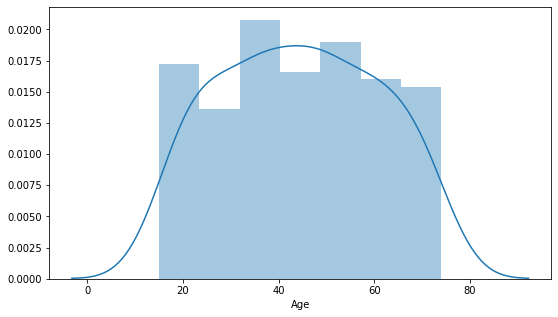

In [8]:
# Age distribution
plt.figure(figsize = (9,5))
sns.distplot(df.Age)
plt.show()

* Age range is between 15 and 74.

<a id='5'></a>
### Sex Variable

In [9]:
df.Sex.value_counts()

M    104
F     96
Name: Sex, dtype: int64

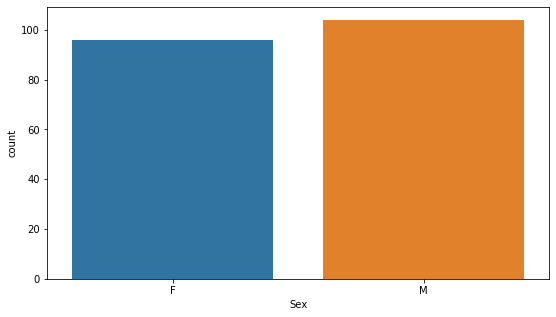

In [10]:
# Sex Distribution
plt.figure(figsize=(9,5))
sns.countplot(x = df.Sex)
plt.show()

* The ratio of gender seems balanced in the data
* This is a categorical variable. It would be better if we apply label encoder to avoid any error during model implementation.

<a id='6'></a>
### BP Variable

In [11]:
df.BP.value_counts()

HIGH      77
LOW       64
NORMAL    59
Name: BP, dtype: int64

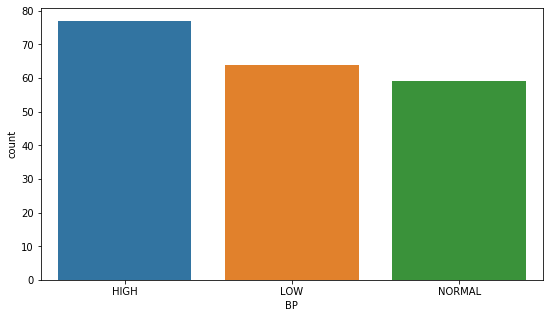

In [12]:
plt.figure(figsize = (9,5))
sns.countplot(df.BP)
plt.show()

<a id='7'></a>
### Cholesterol Variable

In [13]:
df.Cholesterol.value_counts()

HIGH      103
NORMAL     97
Name: Cholesterol, dtype: int64

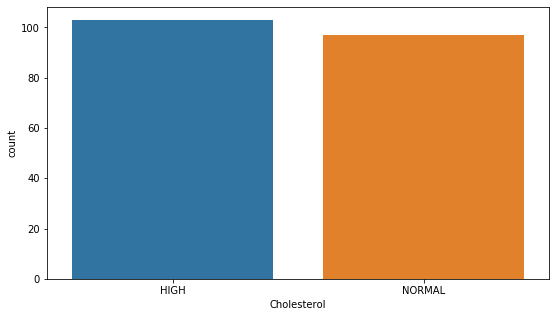

In [14]:
plt.figure(figsize = (9,5))
sns.countplot(df.Cholesterol)
plt.show()

* Cholesterol is a balanced data. 
* It is categorical and label encoder will apply on it.

<a id='8'></a>
### Na_to_K Variable

In [15]:
print("Max Na_to_K:",df.Na_to_K.max())
print("Min Na_to_K:",df.Na_to_K.min())
print("Mean Na_to_K:",df.Na_to_K.mean())

Max Na_to_K: 38.247
Min Na_to_K: 6.269
Mean Na_to_K: 16.08448499999999


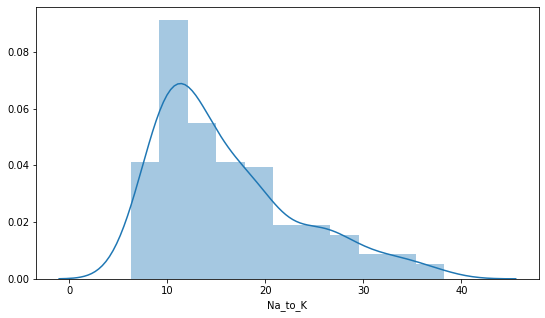

In [16]:
plt.figure(figsize = (9,5))
sns.distplot(df.Na_to_K)
plt.show()

<a id='9'></a>
### Drug Variable

In [17]:
df.Drug.value_counts()

DrugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: Drug, dtype: int64

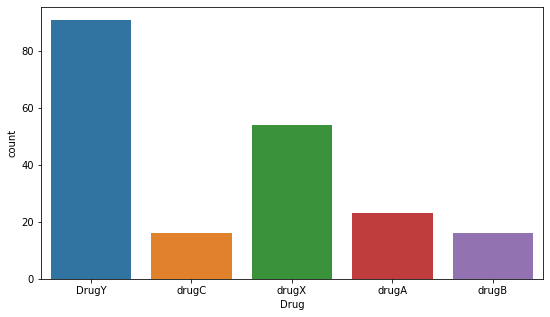

In [18]:
plt.figure(figsize = (9,5))
sns.countplot(df.Drug)
plt.show()

* Drug is target column and you can see that it is unbalanced dataset. Using K Fold cross-validation would be better for reliable results.

<a id='10'></a>
# Basic Data Analysis

* Age -- Drug
* Sex -- Drug
* BP -- Drug
* Cholesterol -- Drug

<a id='11'></a>
## Age -- Drug

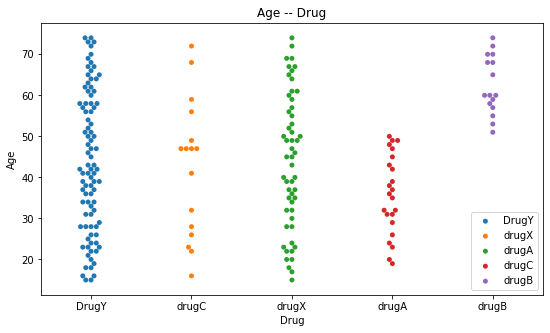

In [19]:
plt.figure(figsize = (9,5))
sns.swarmplot(x = "Drug", y = "Age",data = df)
plt.legend(df.Drug.value_counts().index)
plt.title("Age -- Drug")
plt.show()

In [20]:
print("Minimum Age of DrugB",df.Age[df.Drug == "drugB"].min())
print("Maximum Age of DrugA",df.Age[df.Drug == "drugA"].max())

Minimum Age of DrugB 51
Maximum Age of DrugA 50


* DrugB is taken only by older than 51 years old. 
* DrugA is taken only by younger than 50 years old. 

<a id='12'></a>
## Sex -- Drug

In [21]:
df_Sex_Drug = df.groupby(["Drug","Sex"]).size().reset_index(name = "Count")
df_Sex_Drug

,Drug,Sex,Count
0,DrugY,F,47
1,DrugY,M,44
2,drugA,F,9
3,drugA,M,14
4,drugB,F,6
5,drugB,M,10
6,drugC,F,7
7,drugC,M,9
8,drugX,F,27
9,drugX,M,27


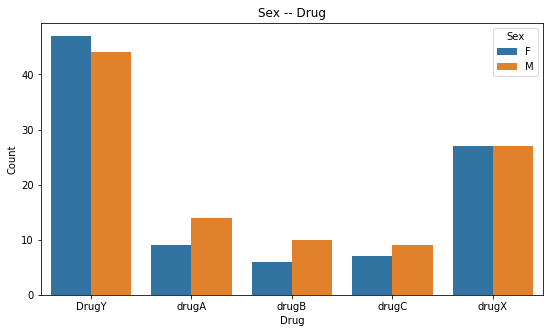

In [22]:

plt.figure(figsize = (9,5))
sns.barplot(x = "Drug",y="Count", hue = "Sex",data = df_Sex_Drug)
plt.title("Sex -- Drug")
plt.show()

* Male people get drugA, drugB and drugC more than male people.
* Female people get DrugY more than female people.
* drugX seems equal for male and female people.
* According to this graph, Sex feature is not an important feature for classification.

<a id='13'></a>
## BP -- Drug

In [23]:
df_BP_Drug = df.groupby(["Drug","BP"]).size().reset_index(name = "Count")
df_BP_Drug

,Drug,BP,Count
0,DrugY,HIGH,38
1,DrugY,LOW,30
2,DrugY,NORMAL,23
3,drugA,HIGH,23
4,drugB,HIGH,16
5,drugC,LOW,16
6,drugX,LOW,18
7,drugX,NORMAL,36


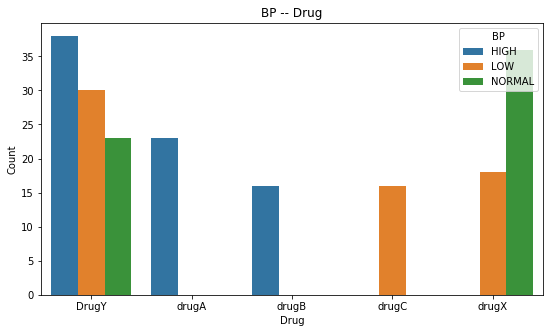

In [24]:
plt.figure(figsize = (9,5))
sns.barplot(x = "Drug",y="Count", hue = "BP",data = df_BP_Drug)
plt.title("BP -- Drug")
plt.show()

* drugA and drugB are got only by people who have HIGH blood pressure.
* drugC is got by people who have LOW blood pressure.
* drugX is got by people who have HIGH blood pressure.
* BP is an important feature for classification.

<a id='14'></a>
## Na_to_K -- Drug

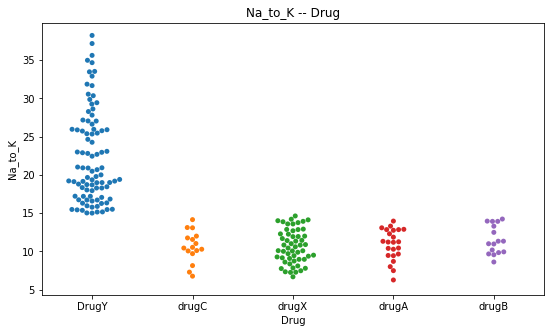

In [25]:
plt.figure(figsize = (9,5))
sns.swarmplot(x = "Drug", y = "Na_to_K",data = df)
plt.title("Na_to_K -- Drug")
plt.show()

In [26]:
print("Minimum Na_to_K for DrugY:",df.Na_to_K[df.Drug == "DrugY"].min())

Minimum Na_to_K for DrugY: 15.015


* People who have Na_to_K ratio is bigger than 15, get DrugY.
* We can create a new feature from here.

<a id='15'></a>
## Cholesterol -- Drug

In [27]:
df_CH_Drug = df.groupby(["Drug","Cholesterol"]).size().reset_index(name = "Count")
df_CH_Drug

,Drug,Cholesterol,Count
0,DrugY,HIGH,47
1,DrugY,NORMAL,44
2,drugA,HIGH,12
3,drugA,NORMAL,11
4,drugB,HIGH,8
5,drugB,NORMAL,8
6,drugC,HIGH,16
7,drugX,HIGH,20
8,drugX,NORMAL,34


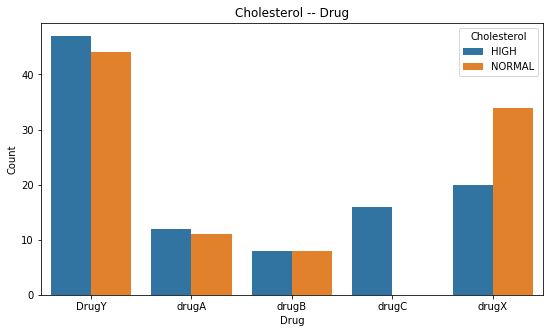

In [28]:
plt.figure(figsize = (9,5))
sns.barplot(x = "Drug",y="Count", hue = "Cholesterol",data = df_CH_Drug)
plt.title("Cholesterol -- Drug")
plt.show()

* drugC is got by people who have HIGH cholesterol.
* Cholesterol is an important feature to classify drugC

<a id='16'></a>
## Na_to_K -- BP -- Drug

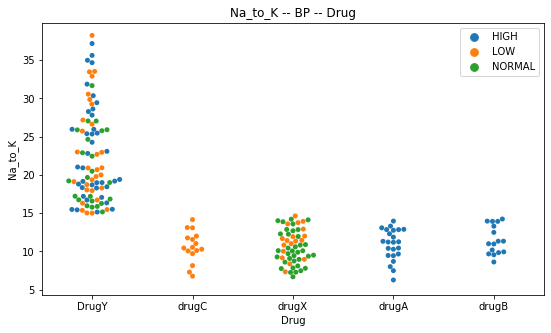

In [29]:
plt.figure(figsize = (9,5))
sns.swarmplot(x = "Drug", y = "Na_to_K",hue="BP",data = df)
plt.legend()
plt.title("Na_to_K -- BP -- Drug")
plt.show()

* If people have HIGH blood pressure and Na_to_K ratio is lower than 15 , they get drugA and drugB only.
* If people have LOW blood pressure and Na_to_K ratio is lower than 15 , they get drugC only.

<a id='17'></a>
# Preparing Data and Feature Engineering

<a id='18'></a>
## Create New Features

<a id='19'></a>
### Na_to_K_Bigger_Than_15 

If Na_to_K is bigger than 15, it is always drugY.

In [30]:
df['Na_to_K_Bigger_Than_15'] = [1 if i >=15.015 else 0 for i in df.Na_to_K]
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug,Na_to_K_Bigger_Than_15
0,23,F,HIGH,HIGH,25.355,DrugY,1
1,47,M,LOW,HIGH,13.093,drugC,0
2,47,M,LOW,HIGH,10.114,drugC,0
3,28,F,NORMAL,HIGH,7.798,drugX,0
4,61,F,LOW,HIGH,18.043,DrugY,1


In [31]:
df_NaK15 = df.groupby(["Drug","Na_to_K_Bigger_Than_15"]).size().reset_index(name = "Count")
df_NaK15

,Drug,Na_to_K_Bigger_Than_15,Count
0,DrugY,1,91
1,drugA,0,23
2,drugB,0,16
3,drugC,0,16
4,drugX,0,54


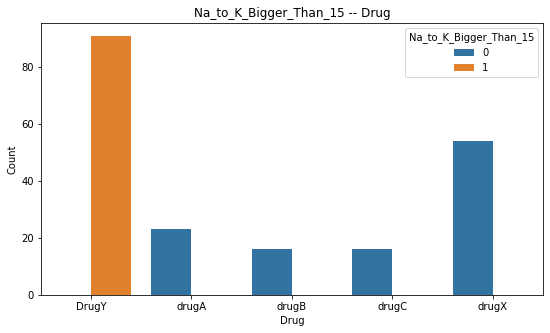

In [32]:
plt.figure(figsize = (9,5))
sns.barplot(x = "Drug",y="Count", hue = "Na_to_K_Bigger_Than_15",data = df_NaK15)
plt.title("Na_to_K_Bigger_Than_15 -- Drug")
plt.show()

* Na_to_K_Bigger_Than_15 feature will be important feature to drugY classification.

<a id='20'></a>
## Label Encoding

We will convert from object to int64

* Sex
* BP
* Cholesterol
* Na_to_K
* Na_to_K_Bigger_Than_15

In [33]:
from sklearn.preprocessing import LabelEncoder

def label_encoder(y):
    le = LabelEncoder()
    df[y] = le.fit_transform(df[y])

In [34]:
label_list = ["Sex","BP","Cholesterol","Na_to_K","Na_to_K_Bigger_Than_15","Drug"]

for l in label_list:
    label_encoder(l)

In [35]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug,Na_to_K_Bigger_Than_15
0,23,0,0,0,167,0,1
1,47,1,1,0,89,3,0
2,47,1,1,0,43,3,0
3,28,0,2,0,10,4,0
4,61,0,1,0,133,0,1


In [36]:
df.tail()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug,Na_to_K_Bigger_Than_15
195,56,0,1,0,69,3,0
196,16,1,1,0,75,3,0
197,52,1,2,0,36,4,0
198,23,1,2,1,102,4,0
199,40,0,1,1,66,4,0


<a id='21'></a>
## Train Test Split

In [37]:
from sklearn.model_selection import train_test_split

x = df.drop(["Drug"],axis=1)
y = df.Drug

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 42, shuffle = True)

y_train = y_train.values.reshape(-1,1)
y_test = y_test.values.reshape(-1,1)

print("x_train shape:",x_train.shape)
print("x_test shape:",x_test.shape)
print("y_train shape:",y_train.shape)
print("y_test shape:",y_test.shape)

x_train shape: (160, 6)
x_test shape: (40, 6)
y_train shape: (160, 1)
y_test shape: (40, 1)


Data was splitted as 80% train data and 20% test data.

<a id='22'></a>
# Model Implementation

I will try three models and compare their results. For all models, I apply GridSearchCV method to find best score. Also, to be sure our models performance are random, I will use 5 Fold Cross Validation method.

In [38]:
# To store results of models
result_dict_train = {}
result_dict_test = {}

<a id='23'></a>
## KNN Classifier

To find best score of KNN model, I will try different value of n_neighbors, p, and weights parameters. If you are not sure about what these parameters are you can check my another kernel [Understanding Parameters of KNN](http://www.kaggle.com/gorkemgunay/understanding-parameters-of-knn)

<a id='24'></a>
### Default Parameters

In [109]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

knn = KNeighborsClassifier()
accuracies = cross_val_score(knn, x_train, y_train, cv=5)
knn.fit(x_train,y_train)

print("Train Score:",np.mean(accuracies))
print("Test Score:",knn.score(x_test,y_test))


Train Score: 0.59375
Test Score: 0.65


C:\Users\nupur\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\nupur\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\nupur\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\nupur\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

In [40]:
result_dict_train["KNN Default Train Score"] = np.mean(accuracies)
result_dict_test["KNN Default Test Score"] = knn.score(x_test,y_test)

<a id='25'></a>
### GridSearchCV

In [41]:
grid = {'n_neighbors':np.arange(1,120),
        'p':np.arange(1,3),
        'weights':['uniform','distance']
       }

knn = KNeighborsClassifier(algorithm = "auto")
knn_cv = GridSearchCV(knn,grid,cv=5)
knn_cv.fit(x_train,y_train)

print("Hyperparameters:",knn_cv.best_params_)
print("Train Score:",knn_cv.best_score_)
print("Test Score:",knn_cv.score(x_test,y_test))

C:\Users\nupur\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\nupur\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\nupur\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\nupur\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

Hyperparameters: {'n_neighbors': 10, 'p': 1, 'weights': 'distance'}
Train Score: 0.75625
Test Score: 0.7


C:\Users\nupur\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\nupur\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [42]:
result_dict_train["KNN GridSearch Train Score"] = knn_cv.best_score_
result_dict_test["KNN GridSearch Test Score"] = knn_cv.score(x_test,y_test)

<a id='26'></a>
# Random Forest


To find best score of Random Forest model, I will try different value of n_estimators and criterion parameters.

<a id='27'></a>
### Default Parameters

In [102]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import metrics

rfc = RandomForestClassifier(random_state = 42)
rfc.fit(x_train,y_train)

y_train_pred= rfc.predict(x_train)


y_test_pred= rfc.predict(x_test)

accuracies = cross_val_score(rfc, x_train, y_train, cv=5)

print("Train Score:",np.mean(accuracies))
print("Test Score:",rfc.score(x_test, y_test))
print("Accuracy:",metrics.accuracy_score(y_test, y_test_pred))

C:\Users\nupur\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys
C:\Users\nupur\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\nupur\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\nupur\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change t

Train Score: 0.98125
Test Score: 0.975
Accuracy: 0.975


In [44]:
result_dict_train["Random Forest Default Train Score"] = np.mean(accuracies)
result_dict_test["Random Forest Default Test Score"] = rfc.score(x_test,y_test)

<a id='28'></a>
### GridSearchCV

In [45]:
grid = {'n_estimators':np.arange(100,1000,100),
        'criterion':['gini','entropy']
       }

rf = RandomForestClassifier(random_state = 42)
rf_cv = GridSearchCV(rf,grid,cv=5)
rf_cv.fit(x_train,y_train)

print("Hyperparameters:",rf_cv.best_params_)
print("Train Score:",rf_cv.best_score_)
print("Test Score:",rf_cv.score(x_test,y_test))

C:\Users\nupur\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\nupur\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\nupur\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\nupur\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y wa

Hyperparameters: {'criterion': 'entropy', 'n_estimators': 100}
Train Score: 0.9875
Test Score: 0.975


C:\Users\nupur\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:880: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


In [46]:
result_dict_train["Random Forest GridSearch Train Score"] = rf_cv.best_score_
result_dict_test["Random Forest GridSearch Test Score"] = rf_cv.score(x_test,y_test)

<a id='29'></a>
# SVM Classifier

To find best score of SVM model, I will try different value of C, kernel, degree and gamma parameters. The easy way to do this is GridSearchCV method. If you are not sure about what these parameters are you can check my another kernel [Understanding Parameters of SVM](https://www.kaggle.com/gorkemgunay/understanding-parameters-of-svm)

<a id='30'></a>
### Default Parameters

In [47]:
from sklearn.svm import SVC
svc = SVC(random_state = 42)
accuracies = cross_val_score(svc, x_train, y_train, cv=5)
svc.fit(x_train,y_train)

print("Train Score:",np.mean(accuracies))
print("Test Score:",svc.score(x_test,y_test))

Train Score: 0.7125
Test Score: 0.65


C:\Users\nupur\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\nupur\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\nupur\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\nupur\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using r

In [48]:
result_dict_train["SVM Default Train Score"] = np.mean(accuracies)
result_dict_test["SVM Default Test Score"] = svc.score(x_test,y_test)

<a id='31'></a>
### GridSearchCV

In [49]:
grid = {
    'C':[0.01,0.1,1,10],
    'kernel' : ["linear","poly","rbf","sigmoid"],
    'degree' : [1,3,5,7],
    'gamma' : [0.01,1]
}

svm  = SVC ();
svm_cv = GridSearchCV(svm, grid, cv = 5)
svm_cv.fit(x_train,y_train)
print("Best Parameters:",svm_cv.best_params_)
print("Train Score:",svm_cv.best_score_)
print("Test Score:",svm_cv.score(x_test,y_test))


C:\Users\nupur\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\nupur\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\nupur\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\nupur\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using r

Best Parameters: {'C': 1, 'degree': 1, 'gamma': 0.01, 'kernel': 'linear'}
Train Score: 0.9875
Test Score: 0.975


C:\Users\nupur\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\nupur\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\nupur\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\nupur\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using r

In [50]:
result_dict_train["SVM GridSearch Train Score"] = svm_cv.best_score_
result_dict_test["SVM GridSearch Test Score"] = svm_cv.score(x_test,y_test)

<a id='32'></a>
# Conclusion

In [51]:
df_result_train = pd.DataFrame.from_dict(result_dict_train,orient = "index",columns=["Score"])
df_result_train

,Score
KNN Default Train Score,0.59375
KNN GridSearch Train Score,0.75625
Random Forest Default Train Score,0.98125
Random Forest GridSearch Train Score,0.98750
SVM Default Train Score,0.71250
SVM GridSearch Train Score,0.98750


In [52]:
df_result_test = pd.DataFrame.from_dict(result_dict_test,orient = "index",columns=["Score"])
df_result_test

,Score
KNN Default Test Score,0.650
KNN GridSearch Test Score,0.700
Random Forest Default Test Score,0.975
Random Forest GridSearch Test Score,0.975
SVM Default Test Score,0.650
SVM GridSearch Test Score,0.975


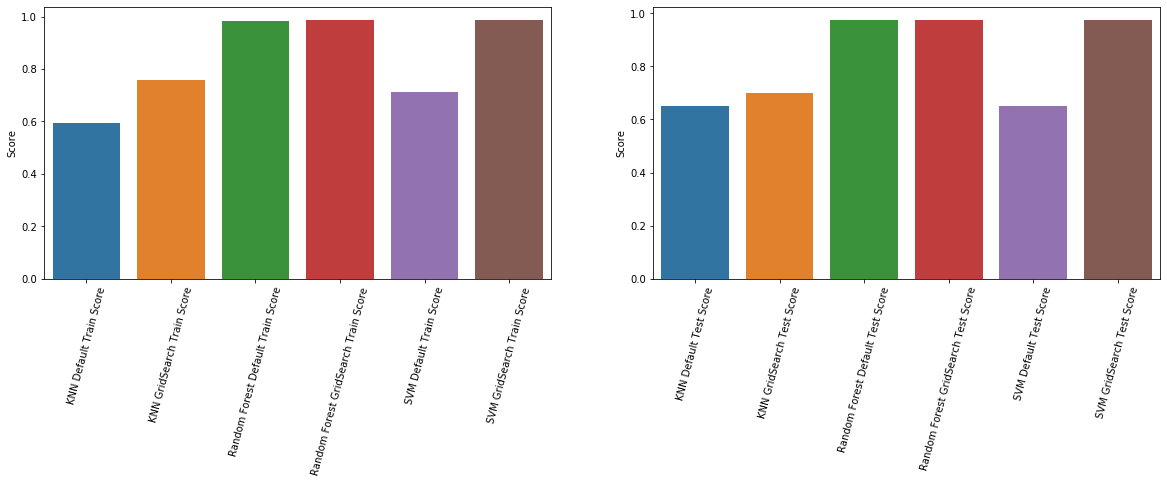

In [53]:
fig,ax = plt.subplots(1,2,figsize=(20,5))
sns.barplot(x = df_result_train.index,y = df_result_train.Score,ax = ax[0])
sns.barplot(x = df_result_test.index,y = df_result_test.Score,ax = ax[1])
ax[0].set_xticklabels(df_result_train.index,rotation = 75)
ax[1].set_xticklabels(df_result_test.index,rotation = 75)
plt.show()

* Random Forest classifier  and SVM classifier (after hyperparameter tuning) have a good scores.
* KNN classifier has worst score in three clasifiers.

In [98]:
import joblib

In [103]:
joblib.dump(rfc, r"C:\Users\nupur\Desktop\data.sav")

['C:\\Users\\nupur\\Desktop\\data.sav']

In [104]:
nm = joblib.load(r"C:\Users\nupur\Desktop\data.sav")

In [105]:
Y_predict= nm.predict(x_test)

In [106]:
from sklearn.metrics import mean_squared_error

In [107]:
mean_squared_error(Y_predict, y_test)

0.025

In [108]:
x_train

,Age,Sex,BP,Cholesterol,Na_to_K,Na_to_K_Bigger_Than_15
79,32,0,1,1,54,0
197,52,1,2,0,36,0
38,39,0,2,1,33,0
24,33,0,1,0,191,1
122,34,1,2,0,158,1
...,...,...,...,...,...,...
106,22,1,2,0,74,0
14,50,0,2,0,80,0
92,29,0,0,0,184,1
179,67,0,2,0,118,1


In [110]:
X_test = pd.DataFrame(x_test)

In [112]:
X_test

In [86]:
Y_predict.T

array([4, 0, 4, 3, 0, 0, 0, 4, 1, 4, 1, 4, 0, 1, 2, 0, 2, 4, 4, 0, 2, 4,
       4, 0, 0, 0, 3, 4, 0, 4, 0, 3, 3, 0, 1, 0, 4, 1, 0, 1])